In [21]:
# Packages
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GaussianMixture
import datetime as D
import numpy as np
import matplotlib.patches as patches
from matplotlib.lines import Line2D

## Récupération des données

In [2]:
#Récupération des données excel
path = r"/Users/thomascgd/Desktop/Esilv/A5/PI2/Donnees_Bloomberg_Daily.xlsx"
data = pd.read_excel(path)

#Réindexation
data.index=data['Date']
del data['Date']

#Suppression des lignes possédant des NaN.
data=data.dropna()

#récupération du S&P 500
SnP = yf.download('^GSPC',"2000-01-01","2023-12-31")

#SnP
data

[*********************100%%**********************]  1 of 1 completed


,Bloomberg Barclays Global Aggregate Bond,Bloomberg Barclays Emerging Markets USD Aggregate,Bloomberg Commodity Index,Bloomberg Barclays Pan-European Aggregate Corporate Hedged to USD,Bloomberg Barclays Pan-European High Yield Hedged to USD,Bloomberg Barclays Global Government 7 to 10 Years Hedged to USD,Bloomberg Barclays US Corporate,Bloomberg Barclays US Corporate High Yield,Bloomberg Barclays US Government Inflation-Linked 7 to 10 Years
Date,,,,,,,,,
2000-01-31,209.9137,231.7258,147.8610,100.21,113.14,275.6170,995.43,546.93,110.098
2000-02-29,209.5158,243.1049,150.4460,101.16,114.67,276.6531,1004.66,547.99,110.522
2000-03-31,213.7084,249.8806,151.9040,102.52,114.38,281.5288,1013.22,536.47,113.565
2000-04-28,208.4867,246.1373,150.0390,102.70,114.84,282.8017,1004.33,537.33,114.718
2000-05-31,209.4520,240.2646,160.1370,102.56,111.47,285.8669,1000.58,531.82,114.478
...,...,...,...,...,...,...,...,...,...
2021-12-27,532.0166,1264.7040,214.3779,295.98,517.22,819.2017,3520.81,2461.96,389.891
2021-12-28,531.8620,1265.4540,213.6978,295.97,517.32,819.3927,3518.94,2463.02,389.891
2021-12-29,531.1477,1264.3740,213.9740,295.25,517.24,817.3085,3504.71,2461.94,389.647


## Risk Factor Lens

In [3]:
Lens=pd.DataFrame(index=data.index,columns=['Rates','Equity','Credit','Commodity'])

Lens['Rates']=data['Bloomberg Barclays Global Government 7 to 10 Years Hedged to USD ']
Lens['Credit']=data['Bloomberg Barclays Pan-European Aggregate Corporate Hedged to USD']
Lens['Commodity']=data['Bloomberg Commodity Index']

for date in Lens.index:
    if date in SnP.index:
        Lens.loc[date,'Equity']=SnP.loc[date,'Adj Close']
        
# Nettoyage car SnP index n'a pas toute les dates demandées
Lens=Lens.dropna()

# Calcul des rendements
for col in Lens.columns:
    Lens[col]=Lens[col].pct_change()

# ajustement des rendements  
for col in Lens.columns:
    Lens[col]=Lens[col].values.reshape(-1,1)

# nettoyage
Lens=Lens.dropna()

Lens

,Rates,Equity,Credit,Commodity
Date,,,,
2000-02-29,0.003759,-0.020108,0.009480,0.017483
2000-03-31,0.017624,0.096720,0.013444,0.009691
2000-04-28,0.004521,-0.030796,0.001756,-0.012277
2000-05-31,0.010839,-0.021915,-0.001363,0.067303
2000-06-30,0.005828,0.023934,0.004485,0.023599
...,...,...,...,...
2021-12-27,0.000252,0.013839,0.000068,0.014942
2021-12-28,0.000233,-0.001010,-0.000034,-0.003172
2021-12-29,-0.002544,0.001402,-0.002433,0.001292


In [14]:
# Chemin du fichier CSV
chemin_fichier_csv = '/Users/thomascgd/Desktop/Esilv/A5/PI2/Data_Lens_Macro_Return.csv'

Lens.to_csv(chemin_fichier_csv,index=True)


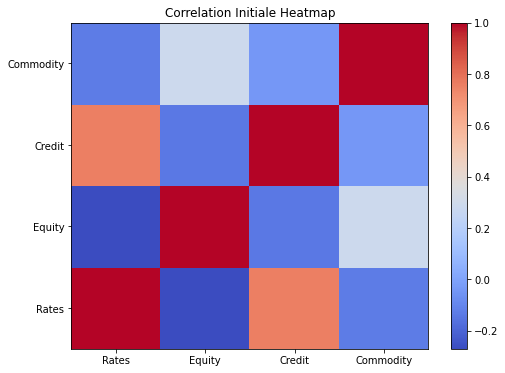

In [4]:
#corrélation
Correlation_initiale=Lens.corr()

# Create a heatmap using matplotlib
plt.figure(figsize=(8, 6))
heatmap = plt.pcolor(Correlation_initiale, cmap='coolwarm')

# Add colorbar
plt.colorbar(heatmap)

# Set ticks at the middle of each cell
plt.xticks(np.arange(0.5, len(Correlation_initiale.columns), 1), Correlation_initiale.columns)
plt.yticks(np.arange(0.5, len(Correlation_initiale.index), 1), Correlation_initiale.columns)


plt.title('Correlation Initiale Heatmap')
plt.show()

In [5]:
Correlation_initiale

,Rates,Equity,Credit,Commodity
Rates,1.000000,-0.269855,0.757008,-0.126467
Equity,-0.269855,1.000000,-0.136154,0.289524
Credit,0.757008,-0.136154,1.000000,-0.037419
Commodity,-0.126467,0.289524,-0.037419,1.000000


## Exponentially-weighted regression

In [6]:
Lens_adj=Lens.copy(deep=True)
Lens_adj

,Rates,Equity,Credit,Commodity
Date,,,,
2000-02-29,0.003759,-0.020108,0.009480,0.017483
2000-03-31,0.017624,0.096720,0.013444,0.009691
2000-04-28,0.004521,-0.030796,0.001756,-0.012277
2000-05-31,0.010839,-0.021915,-0.001363,0.067303
2000-06-30,0.005828,0.023934,0.004485,0.023599
...,...,...,...,...
2021-12-27,0.000252,0.013839,0.000068,0.014942
2021-12-28,0.000233,-0.001010,-0.000034,-0.003172
2021-12-29,-0.002544,0.001402,-0.002433,0.001292


In [7]:
# Define the rolling window size
rolling_window = 252  # Assuming daily returns with approximately 252 trading days in a year

# Exponentially weighted residualization process using pd.ewm() and pd.DataFrame.rolling()
def ewm_residualize(donnees, dependent_column, independent_columns, span):
    result = pd.DataFrame(index=donnees.index)
    
    for col in independent_columns:
        # Calculate EWMA of the independent variable
        ewma_x = donnees[col].ewm(span=span).mean()

        # Calculate EWMA of the dependent variable
        ewma_y = donnees[dependent_column].ewm(span=span).mean()

        # Calculate residuals using rolling regression
        residuals = donnees[dependent_column] - ewma_y
        for i in range(rolling_window, len(donnees)):
            window_data = donnees[i - rolling_window:i + 1]
            window_ewma_x = ewma_x[i - rolling_window:i + 1]

            # Rolling regression to calculate residuals
            X = np.column_stack((np.ones_like(window_ewma_x), window_ewma_x))
            beta = np.linalg.lstsq(X, window_data[dependent_column], rcond=None)[0]
            residuals.iloc[i] = window_data[dependent_column].iloc[-1] - np.dot(X[-1, :], beta)

        result[col + '_residual'] = residuals
    
    return result

In [8]:
#Test sur la colonne Credit

# Apply exponentially weighted residualization to Credit returns with Interest Rates and Equity
span_parameter = 20  # Adjust span parameter based on preferences
residualized_data = ewm_residualize(Lens_adj, 'Credit', ['Rates', 'Equity'], span_parameter)

# Display the results
print(residualized_data)

            Rates_residual  Equity_residual
Date                                       
2000-02-29        0.000000         0.000000
2000-03-31        0.001883         0.001883
2000-04-28       -0.006205        -0.006205
2000-05-31       -0.006632        -0.006632
2000-06-30       -0.000594        -0.000594
...                    ...              ...
2021-12-27        0.000331        -0.000040
2021-12-28        0.000170        -0.000112
2021-12-29       -0.001905        -0.002480
2021-12-30        0.000626         0.000114
2021-12-31        0.000658         0.000238

[4952 rows x 2 columns]


In [9]:
span_parameter = 20  # Adjust span parameter based on preferences
#residualized_data = ewm_residualize(Returns, 'Credit', ['Rates', 'Equity'], span_parameter)
for i in range(2,len(Lens_adj.columns)):
    residualized_data = ewm_residualize(Lens_adj, Lens_adj.columns[i], ['Rates', 'Equity'], span_parameter)
    for d in Lens_adj.index:
        for j in residualized_data.columns:
            Lens_adj['Credit'].loc[d]=Lens_adj['Credit'].loc[d]-residualized_data[j].loc[d]

Lens_adj

,Rates,Equity,Credit,Commodity
Date,,,,
2000-02-29,0.003759,-0.020108,0.009480,0.017483
2000-03-31,0.017624,0.096720,0.017080,0.009691
2000-04-28,0.004521,-0.030796,0.046653,-0.012277
2000-05-31,0.010839,-0.021915,-0.078203,0.067303
2000-06-30,0.005828,0.023934,0.003630,0.023599
...,...,...,...,...
2021-12-27,0.000252,0.013839,-0.024773,0.014942
2021-12-28,0.000233,-0.001010,0.010788,-0.003172
2021-12-29,-0.002544,0.001402,0.004042,0.001292


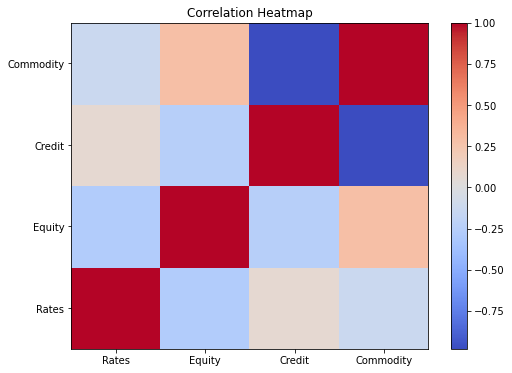

In [10]:
#corrélation
Correlation_apres_traitement=Lens_adj.corr()

# Create a heatmap using matplotlib
plt.figure(figsize=(8, 6))
heatmap = plt.pcolor(Correlation_apres_traitement, cmap='coolwarm')

# Add colorbar
plt.colorbar(heatmap)

# Set ticks at the middle of each cell
plt.xticks(np.arange(0.5, len(Correlation_apres_traitement.columns), 1), Correlation_apres_traitement.columns)
plt.yticks(np.arange(0.5, len(Correlation_apres_traitement.index), 1), Correlation_apres_traitement.columns)


plt.title('Correlation Heatmap')
plt.show()

In [11]:
Correlation_initiale #Corrélations avant regression exponentielle

,Rates,Equity,Credit,Commodity
Rates,1.000000,-0.269855,0.757008,-0.126467
Equity,-0.269855,1.000000,-0.136154,0.289524
Credit,0.757008,-0.136154,1.000000,-0.037419
Commodity,-0.126467,0.289524,-0.037419,1.000000


In [12]:
Correlation_apres_traitement #Corrélations après régression exponentielle

,Rates,Equity,Credit,Commodity
Rates,1.000000,-0.269855,0.076627,-0.126467
Equity,-0.269855,1.000000,-0.242313,0.289524
Credit,0.076627,-0.242313,1.000000,-0.979828
Commodity,-0.126467,0.289524,-0.979828,1.000000


## GMM

In [45]:
# Création des dataset pour s'entrainer et tester
df_train = Lens_adj[Lens_adj.index<pd.to_datetime('2010-01-01')]
df_test = Lens_adj[Lens_adj.index>pd.to_datetime('2010-01-01')]

num_states = 4  # Définissez le nombre d'états de marché
model = GaussianMixture(n_components=num_states)

# Ajustez le modèle
model.fit(df_train)

# 4. Identification des états de marché
market_states = model.predict(df_test)
Proba_market_states=model.predict_proba(df_test)

# Ajoutez les états de marché en tant que colonne dans les données
res=np.column_stack((df_test, market_states,Proba_market_states))
res=pd.DataFrame(res,index=df_test.index,columns=['Rates','Equity','Credit','Commodity','Market_State','0','1','2','3'])
res

,Rates,Equity,Credit,Commodity,Market_State,0,1,2,3
Date,,,,,,,,,
2010-01-04,0.000234,0.016043,-0.041084,0.022385,1.0,0.464329,0.506030,0.000214,0.029427
2010-01-05,0.001241,0.003116,0.006221,-0.001329,0.0,0.903868,0.095197,0.000027,0.000909
2010-01-06,-0.001660,0.000546,-0.036083,0.020527,0.0,0.774985,0.219504,0.000058,0.005453
2010-01-07,0.000519,0.004001,0.032850,-0.015051,0.0,0.801797,0.196184,0.000100,0.001919
2010-01-08,0.000353,0.002882,0.010329,-0.003042,0.0,0.898680,0.100491,0.000028,0.000802
...,...,...,...,...,...,...,...,...,...
2021-12-27,0.000252,0.013839,-0.024773,0.014942,0.0,0.676903,0.315400,0.000113,0.007584
2021-12-28,0.000233,-0.001010,0.010788,-0.003172,0.0,0.899856,0.099364,0.000028,0.000752
2021-12-29,-0.002544,0.001402,0.004042,0.001292,0.0,0.880934,0.118015,0.000050,0.001001


In [46]:
# Affichez les statistiques des différents états de marché
for state in range(num_states):
    state_data = res[res['Market_State'] == state]
    print("\n ------------------------------------------- \n")
    print(f"État de marché {state} - Nombre d'observations : {len(state_data)}")
    print(state_data.iloc[:,:4].describe()) #voir si on garde la colonne Adj Close


 ------------------------------------------- 

État de marché 0 - Nombre d'observations : 2623
             Rates       Equity       Credit    Commodity
count  2623.000000  2623.000000  2623.000000  2623.000000
mean      0.000111     0.001430    -0.000419     0.000455
std       0.001557     0.006364     0.014724     0.007404
min      -0.007696    -0.016653    -0.062178    -0.023126
25%      -0.000770    -0.002451    -0.009420    -0.004327
50%       0.000166     0.001110    -0.000365     0.000576
75%       0.001090     0.005336     0.009228     0.004979
max       0.005820     0.019574     0.049334     0.032185

 ------------------------------------------- 

État de marché 1 - Nombre d'observations : 284
            Rates      Equity      Credit   Commodity
count  284.000000  284.000000  284.000000  284.000000
mean     0.000721   -0.007251    0.006983   -0.004471
std      0.002375    0.020561    0.028703    0.015118
min     -0.007327   -0.058944   -0.068677   -0.046704
25%     -0.000750

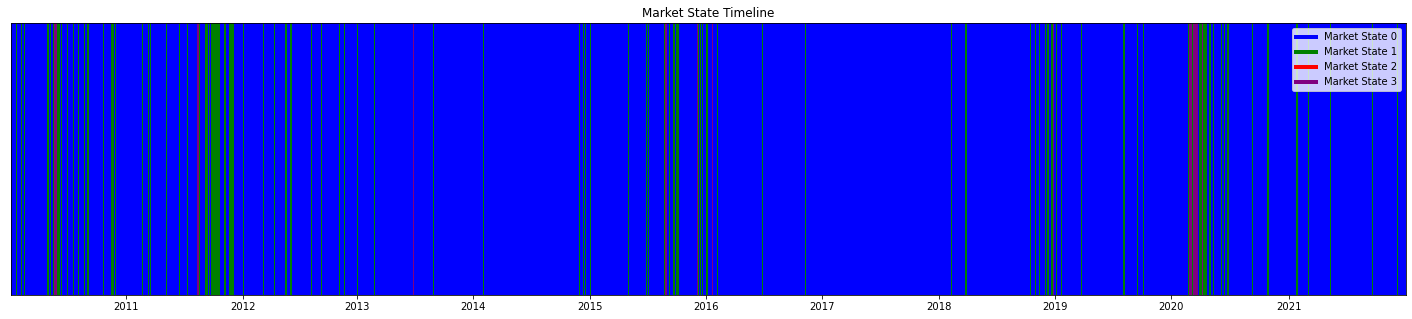

In [49]:
# Couleurs pour chaque régime de marché
colors = {'0': 'blue', '1': 'green', '2': 'red', '3': 'purple'}

# Création d'une figure pour la frise
fig, ax = plt.subplots(figsize=(25, 5))

# Hauteur du rectangle pour la frise
rectangle_height = 1

# Tracé des rectangles pour chaque date
for i, date in enumerate(res.index):
    # Déterminer la couleur en fonction du régime de marché
    market_state = str(int(res.at[date, 'Market_State']))  # Conversion en chaîne après conversion en entier
    color = colors[market_state]
    
    # Création du rectangle
    rect = patches.Rectangle((i, 0), 1, rectangle_height, color=color)
    ax.add_patch(rect)

# Configuration de l'axe des x pour afficher uniquement les années
years = [date.year for date in res.index]
change_years = [i for i in range(1, len(years)) if years[i] != years[i-1]]
ax.set_xticks(change_years)
ax.set_xticklabels([years[i] for i in change_years])

# Configuration des limites de l'axe
ax.set_xlim(0, len(res))
ax.set_ylim(0, rectangle_height)
ax.set_yticks([])  # Pas de marques sur l'axe des y

# Création d'une légende pour les états de marché
legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'Market State {state}') for state, color in colors.items()]
ax.legend(handles=legend_elements, loc='upper right')

# Titre et affichage du graphique
ax.set_title('Market State Timeline')
plt.show()

In [16]:
#Résultats en pourcentage
res_pct=res.copy(deep=True)

for col in res_pct.columns:
    res_pct[col]=res_pct[col]*100

res_pct

,Rates,Equity,Credit,Commodity,Market_State,0,1,2,3
Date,,,,,,,,,
2010-01-04,0.023450,1.604342,-4.108396,2.238515,0.0,89.769886,0.053088,7.743019,2.434006
2010-01-05,0.124144,0.311568,0.622107,-0.132875,0.0,90.828637,0.005193,0.254406,8.911764
2010-01-06,-0.165978,0.054552,-3.608260,2.052736,0.0,94.738572,0.014008,1.637438,3.609982
2010-01-07,0.051878,0.400120,3.284989,-1.505062,0.0,69.651847,0.017130,0.550390,29.780632
2010-01-08,0.035332,0.288173,1.032871,-0.304230,0.0,88.867792,0.005259,0.247490,10.879459
...,...,...,...,...,...,...,...,...,...
2021-12-27,0.025238,1.383894,-2.477282,1.494211,0.0,93.814790,0.020421,1.853466,4.311323
2021-12-28,0.023315,-0.101015,1.078793,-0.317244,0.0,87.995893,0.005476,0.238562,11.760069
2021-12-29,-0.254359,0.140190,0.404176,0.129248,0.0,88.810991,0.009136,0.357544,10.822329


In [18]:
# Affichez les statistiques des différents états de marché en %
for state in range(num_states):
    state_data = res_pct[res_pct['Market_State'] == state*100]
    print("\n ------------------------------------------- \n")
    print(f"État de marché {state} - Nombre d'observations : {len(state_data)}")
    print(state_data.iloc[:,:4].describe()) #voir si on garde la colonne Adj Close 


 ------------------------------------------- 

État de marché 0 - Nombre d'observations : 2686
             Rates       Equity       Credit    Commodity
count  2686.000000  2686.000000  2686.000000  2686.000000
mean      0.009126     0.169135    -0.109000     0.079513
std       0.157645     0.697407     1.481782     0.746834
min      -0.769593    -1.830958    -6.867694    -2.179396
25%      -0.078835    -0.243745    -1.003868    -0.409230
50%       0.014713     0.121593    -0.071817     0.074905
75%       0.108297     0.571819     0.881287     0.528171
max       0.581977     2.658392     4.721662     3.447713

 ------------------------------------------- 

État de marché 1 - Nombre d'observations : 10
           Rates     Equity     Credit  Commodity
count  10.000000  10.000000  10.000000  10.000000
mean   -0.378002  -0.865178   2.830735  -2.011716
std     0.695128   7.200527   4.436931   2.047869
min    -0.968062 -11.984055  -5.238455  -4.177748
25%    -0.882439  -4.971295   0.824117